<a href="https://colab.research.google.com/github/CaioSoares-V8/Analise_Survey_Stack_Overflow/blob/main/Analise_Survey_Stack_Overflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Survey Stack Overflow

## Contexto

Com o avanço significativo dos Modelos de Inteligência Artificial LLM e o surgimento de diversas ferramentas que os utilizam, a empresa V8.Tech está interessada em incorporar algumas dessas soluções no dia a dia de seus colaboradores.

Para tomar uma decisão mais assertiva sobre qual ferramenta adotar, foi solicitado que uma análise seja feita utilizando os registros de dados da pesquisa **Survey Stack Overflow 2024**, que em meio a tratativa de diversos assuntos relacionados a tecnologia, investigou o uso de IA entre profissionais de tecnologia e desenvolvimento, abordando questões como popularidade das ferramentas, confiabilidade e utilidade em tarefas mais complexas.

## Extração

Importando as bibliotecas necessárias

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

Lendo os arquivos **CSV** e os armazenando em **DataFrame**s da biblioteca Pandas

In [111]:
schema = pd.read_csv('survey_results_schema.csv')

In [112]:
dados = pd.read_csv('survey_results_public.csv')

Convertendo esses arquivos para **XLSX** (Excel), para uma melhor análise de contexto

In [113]:
schema.to_excel('schema.xlsx', index=False)

In [ ]:
dados.to_excel('public.xlsx', index=False)

Visualizando o DataFrame em detalhes

In [115]:
dados.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [116]:
dados.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [117]:
dados.size

7459818

In [118]:
dados.shape

(65437, 114)

O arquivo bruto contém um total de **7.459.818** dados, organizados em **65.437** linhas e **114** colunas, abrangendo assuntos como: Educação, Trabalho, Carreira, Linguagens, Frameworks, Softwares e Sistemas Operacionais mais utilizados, Comunidade Stack Overflow e Inteligência Artificial.

Diante da necessidade de uma análise mais precisa e direcionada, se torna importante filtrar as informações mais relevantes para o nosso contexto.

## Tratamento

Selecionando as colunas relevantes

In [119]:
dados_tratados = dados[['ResponseId', 'MainBranch', 'Age', 'Employment',
                        'YearsCodePro', 'DevType', 'Country','AISearchDevHaveWorkedWith',
                        'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'AISelect', 'AISent',
                        'AIBen', 'AIAcc', 'AIComplex', 'AIThreat', 'ProfessionalQuestion', 'Industry', 'JobSat']]

Aqui está uma lista com todas as colunas filtradas por categoria:

**Informações Básicas e Carreira**
- ResponseId
- MainBranch
- Age
- Employment
- YearsCodePro
- DevType
- Country
- ProfessionalQuestion
- Industry
- JobSat


**Inteligencia Artificial**
- AISearchDevHaveWorkedWith
- AISearchDevWantToWorkWith
- AISearchDevAdmired
- AISelect
- AISent
- AIBen
- AIAcc
- AIComplex
- AIThreat





Visualizando os dados selecionados

In [120]:
dados_tratados.head()

,ResponseId,MainBranch,Age,Employment,YearsCodePro,DevType,Country,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,AISelect,AISent,AIBen,AIAcc,AIComplex,AIThreat,ProfessionalQuestion,Industry,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",NaN,NaN,United States of America,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",27,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",Canada,NaN,NaN,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks,No,NaN,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",Norway,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Salvando os novos dados em XLSX (Excel) para uma nova análise de contexto

In [121]:
dados_tratados.to_excel('dados_tratados.xlsx', index=False)

Removendo os dados nulos referentes a utilização de IA

In [122]:
dados_tratados = dados_tratados.dropna(subset=['AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired'])

Agrupando a sessão de respostas referentes a utilização de IA

In [123]:
AI_search = dados_tratados[['AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired']]

Fragmentando a coluna, possibilitando a análise isolada e o agrupamento de cada IA específica

In [124]:
have_worked_ia = AI_search['AISearchDevHaveWorkedWith'].str.get_dummies(';')
want_to_work_ia = AI_search['AISearchDevWantToWorkWith'].str.get_dummies(';')
admired_ia = AI_search['AISearchDevAdmired'].str.get_dummies(';')

Visualizando as colunas

In [125]:
have_worked_ia.head()

,Amazon Q,Andi,AskCodi,Bing AI,ChatGPT,Claude,Codeium,Cody,GitHub Copilot,Google Gemini,...,Perplexity AI,Phind,Quora Poe,Replit Ghostwriter,Snyk Code,Tabnine,Visual Studio Intellicode,Whispr AI,WolframAlpha,You.com
5,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
have_worked_ia.size

888575

Agrupando os valores

In [127]:
have_worked_ia_results = {}

for i in have_worked_ia.columns:
    soma = have_worked_ia[i].sum()
    have_worked_ia_results[i] = soma

want_to_work_ia_results = {}

for i in want_to_work_ia.columns:
    soma = want_to_work_ia[i].sum()
    want_to_work_ia_results[i] = soma

admired_ia_results = {}

for i in admired_ia.columns:
    soma = admired_ia[i].sum()
    admired_ia_results[i] = soma

have_worked_ia_results

{'Amazon Q': 957,
 'Andi': 83,
 'AskCodi': 106,
 'Bing AI': 6129,
 'ChatGPT': 30800,
 'Claude': 3192,
 'Codeium': 2407,
 'Cody': 498,
 'GitHub Copilot': 16017,
 'Google Gemini': 9283,
 'Lightning AI': 124,
 'Meta AI': 1241,
 'Metaphor': 61,
 'Neeva AI': 67,
 'OpenAI Codex': 460,
 'Perplexity AI': 2151,
 'Phind': 1514,
 'Quora Poe': 377,
 'Replit Ghostwriter': 162,
 'Snyk Code': 323,
 'Tabnine': 1972,
 'Visual Studio Intellicode': 5418,
 'Whispr AI': 393,
 'WolframAlpha': 2257,
 'You.com': 530}

In [128]:
sum(have_worked_ia_results.values())

86522

## Resultados

Relação entre todas as IAs e o número de usuários que as utilizaram regularmente no último ano (2023).
- Amazon Q: 957
- Andi: 83
- AskCodi: 106
- Bing AI: 6129
- ChatGPT: 30.800
- Claude: 3192
- Codeium: 2407
- Cody: 498
- GitHub Copilot: 16.017
- Google Gemini: 9283
- Lightning AI: 124
- Meta AI: 1241
- Metaphor: 61
- Neeva AI: 67
- OpenAI Codex: 460
- Perplexity AI: 2151
- Phind: 1514
- Quora Poe: 377
- Replit Ghostwriter: 162
- Snyk Code: 323
- Tabnine: 1972
- Visual Studio Intellicode: 5418
- Whispr AI: 393
- WolframAlpha: 2257
- You.com: 530

Total de Usuários: 86.522

Calculando percentual

In [129]:
total_worked = sum(have_worked_ia_results.values())
have_worked_ia_results = {chave: round((valor / total_worked) * 100, 1) for chave, valor in have_worked_ia_results.items()}

total_want = sum(want_to_work_ia_results.values())
want_to_work_ia_results = {chave: round((valor / total_want) * 100, 1) for chave, valor in want_to_work_ia_results.items()}

total_admired = sum(admired_ia_results.values())
admired_ia_results = {chave: round((valor / total_admired) * 100, 1) for chave, valor in admired_ia_results.items()}

have_worked_ia_results


{'Amazon Q': 1.1,
 'Andi': 0.1,
 'AskCodi': 0.1,
 'Bing AI': 7.1,
 'ChatGPT': 35.6,
 'Claude': 3.7,
 'Codeium': 2.8,
 'Cody': 0.6,
 'GitHub Copilot': 18.5,
 'Google Gemini': 10.7,
 'Lightning AI': 0.1,
 'Meta AI': 1.4,
 'Metaphor': 0.1,
 'Neeva AI': 0.1,
 'OpenAI Codex': 0.5,
 'Perplexity AI': 2.5,
 'Phind': 1.7,
 'Quora Poe': 0.4,
 'Replit Ghostwriter': 0.2,
 'Snyk Code': 0.4,
 'Tabnine': 2.3,
 'Visual Studio Intellicode': 6.3,
 'Whispr AI': 0.5,
 'WolframAlpha': 2.6,
 'You.com': 0.6}

### GRÁFICOS

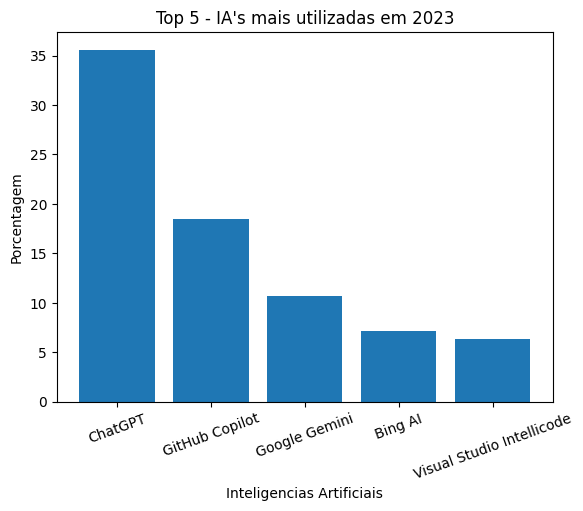

In [130]:
sum(have_worked_ia_results.values())
maiores_valores = dict(sorted(have_worked_ia_results.items(), key=lambda x: x[1], reverse=True)[:5])

chaves = list(maiores_valores.keys())
valores = list(maiores_valores.values())

plt.bar(chaves, valores)

plt.title("Top 5 - IA's mais utilizadas em 2023")
plt.xlabel('Inteligencias Artificiais')
plt.ylabel('Porcentagem')
plt.xticks(rotation=20)
plt.show()

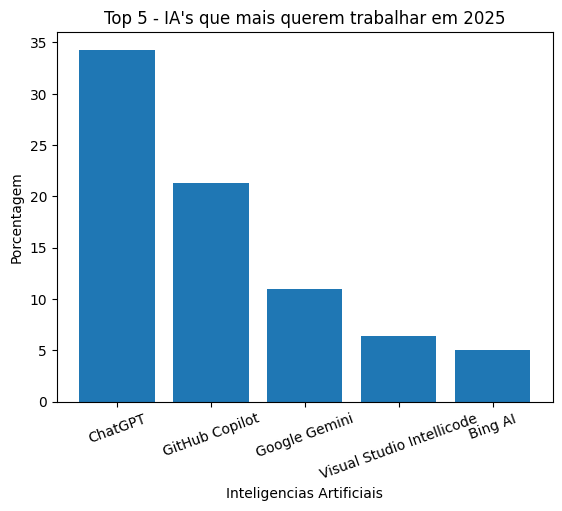

In [229]:
sum(want_to_work_ia_results.values())
maiores_valores = dict(sorted(want_to_work_ia_results.items(), key=lambda x: x[1], reverse=True)[:5])

chaves = list(maiores_valores.keys())
valores = list(maiores_valores.values())

plt.bar(chaves, valores)

plt.title("Top 5 - IA's que mais querem trabalhar em 2025")
plt.xlabel('Inteligencias Artificiais')
plt.ylabel('Porcentagem')
plt.xticks(rotation=20)
plt.show()

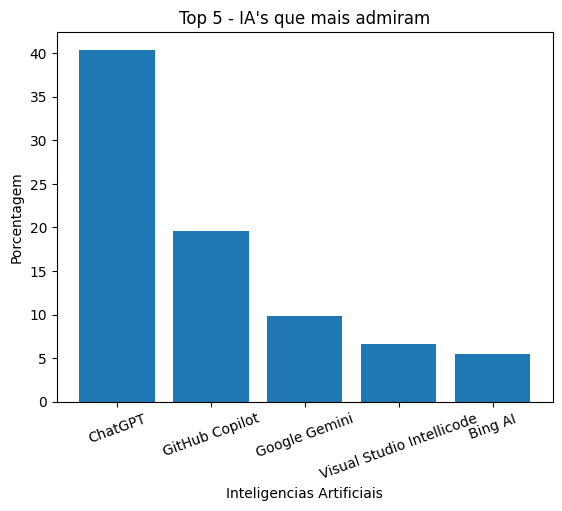

In [132]:
sum(admired_ia_results.values())
maiores_valores = dict(sorted(admired_ia_results.items(), key=lambda x: x[1], reverse=True)[:5])

chaves = list(maiores_valores.keys())
valores = list(maiores_valores.values())

plt.bar(chaves, valores)

plt.title("Top 5 - IA's que mais admiram")
plt.xlabel('Inteligencias Artificiais')
plt.ylabel('Porcentagem')
plt.xticks(rotation=20)
plt.show()

## Compactando o DataFrame

Unindo os dados tratados ao DataFrame de utilização de IAs

In [133]:
dados = pd.concat([dados_tratados, have_worked_ia], axis=1)

In [134]:
dados.head()

,ResponseId,MainBranch,Age,Employment,YearsCodePro,DevType,Country,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,...,Perplexity AI,Phind,Quora Poe,Replit Ghostwriter,Snyk Code,Tabnine,Visual Studio Intellicode,Whispr AI,WolframAlpha,You.com
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Student,United States of America,ChatGPT;GitHub Copilot;OpenAI Codex,ChatGPT;GitHub Copilot,ChatGPT;GitHub Copilot,...,0,0,0,0,0,0,0,0,0,0
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Student,Uzbekistan,ChatGPT,ChatGPT,ChatGPT,...,0,0,0,0,0,0,0,0,0,0
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",11,"Developer, full-stack",Serbia,ChatGPT;Google Gemini,ChatGPT;Google Gemini,ChatGPT;Google Gemini,...,0,0,0,0,0,0,0,0,0,0
10,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",NaN,Project manager,United States of America,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...,GitHub Copilot;Google Gemini;Visual Studio Int...,...,0,0,0,0,0,0,1,0,0,0
13,14,"I used to be a developer by profession, but no...",35-44 years old,"Not employed, and not looking for work",NaN,Other (please specify):,Philippines,ChatGPT,ChatGPT,ChatGPT,...,0,0,0,0,0,0,0,0,0,0


Validando colunas

In [135]:
dados.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'YearsCodePro',
       'DevType', 'Country', 'AISearchDevHaveWorkedWith',
       'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'AISelect', 'AISent',
       'AIBen', 'AIAcc', 'AIComplex', 'AIThreat', 'ProfessionalQuestion',
       'Industry', 'JobSat', 'Amazon Q', 'Andi', 'AskCodi', 'Bing AI',
       'ChatGPT', 'Claude', 'Codeium', 'Cody', 'GitHub Copilot',
       'Google Gemini', 'Lightning AI', 'Meta AI', 'Metaphor', 'Neeva AI',
       'OpenAI Codex', 'Perplexity AI', 'Phind', 'Quora Poe',
       'Replit Ghostwriter', 'Snyk Code', 'Tabnine',
       'Visual Studio Intellicode', 'Whispr AI', 'WolframAlpha', 'You.com'],
      dtype='object')

In [136]:
dados.size

1563892

In [137]:
dados.shape

(35543, 44)

Nosso DataFrame filtrado e tratado conta com **1.563.892** dados dispostos em **35.543** linhas e **44** colunas

## Análise

Está análise foi baseada nas 5 Principais inteligencias artificiais indicadas como o resultado da pesquisa de utilização de IAs
- ChatGPT
- GitHub Copilot
- Google Gemini
- Bing AI
- Visual Studio Intellicode

### Agrupamento por paises

In [138]:
resultado_paises = dados.groupby('Country')['ChatGPT'].sum()

In [139]:
resultado_paises = resultado_paises.to_dict()
resultado_paises

{'Afghanistan': 17,
 'Albania': 24,
 'Algeria': 53,
 'Andorra': 6,
 'Angola': 8,
 'Antigua and Barbuda': 1,
 'Argentina': 187,
 'Armenia': 26,
 'Australia': 584,
 'Austria': 410,
 'Azerbaijan': 20,
 'Bahamas': 1,
 'Bahrain': 2,
 'Bangladesh': 233,
 'Barbados': 1,
 'Belarus': 47,
 'Belgium': 275,
 'Belize': 1,
 'Benin': 4,
 'Bhutan': 2,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 31,
 'Botswana': 2,
 'Brazil': 809,
 'Brunei Darussalam': 2,
 'Bulgaria': 165,
 'Burkina Faso': 4,
 'Burundi': 1,
 'Cambodia': 13,
 'Cameroon': 22,
 'Canada': 937,
 'Cape Verde': 5,
 'Chad': 1,
 'Chile': 75,
 'China': 235,
 'Colombia': 136,
 'Congo, Republic of the...': 5,
 'Costa Rica': 32,
 'Croatia': 109,
 'Cuba': 14,
 'Cyprus': 27,
 'Czech Republic': 393,
 "Côte d'Ivoire": 10,
 "Democratic People's Republic of Korea": 1,
 'Democratic Republic of the Congo': 1,
 'Denmark': 233,
 'Djibouti': 0,
 'Dominican Republic': 25,
 'Ecuador': 29,
 'Egypt': 181,
 'El Salvador': 15,
 'Equatorial Guinea': 1,
 'Estonia': 74

Filtrando por Brasil e Estados Unidos

In [140]:
resultado_brasil = dados[dados['Country'] == 'Brazil']
resultado_eua = dados[dados['Country'] == 'United States of America']

In [141]:
resultado_brasil = resultado_brasil.groupby('Country')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_eua = resultado_eua.groupby('Country')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()

Exibindo Gráfico - **Brasil**

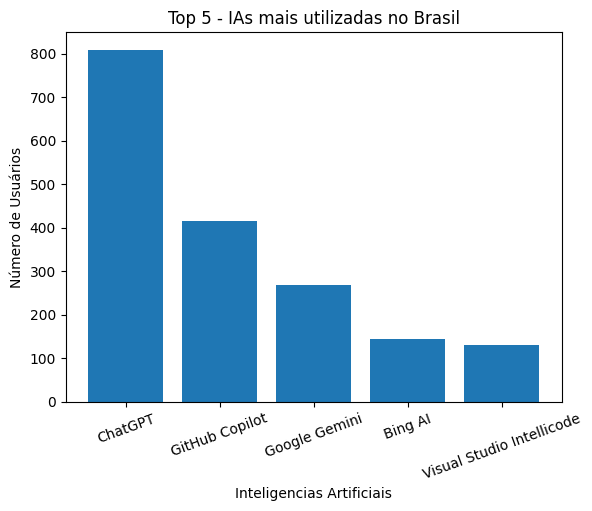

In [142]:
categorias = resultado_brasil.columns[1:]
valores = resultado_brasil.iloc[0, 1:].values

plt.bar(categorias, valores)

plt.title("Top 5 - IAs mais utilizadas no Brasil")
plt.xlabel('Inteligencias Artificiais')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=20)
plt.show()

Exibindo Gráfico - **Estados Unidos**

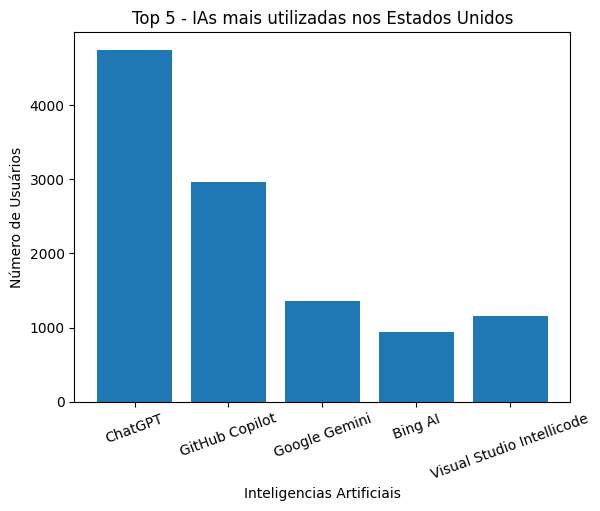

In [143]:
categorias = resultado_eua.columns[1:]
valores = resultado_eua.iloc[0, 1:].values

plt.bar(categorias, valores)

plt.title("Top 5 - IAs mais utilizadas nos Estados Unidos")
plt.xlabel('Inteligencias Artificiais')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=20)
plt.show()

### Agrupamento por faixa etária

In [220]:
resultado_faixa_etaria = dados.groupby('Age')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_faixa_etaria

,Age,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,18-24 years old,7378,3664,2708,1739,1260
1,25-34 years old,11846,6154,3335,1968,1684
2,35-44 years old,6643,3840,1761,1158,1213
3,45-54 years old,2531,1398,689,566,635
4,55-64 years old,860,407,218,190,249
5,65 years or older,189,63,44,49,54
6,Prefer not to say,87,26,36,30,19
7,Under 18 years old,1266,465,492,429,304


In [222]:
def somatoria(IA):
    return resultado_faixa_etaria[IA].sum()

somatoria('ChatGPT')

30800

**ChatGPT** tem a maior somatória de usuários em variadas faixas etárias dentre todas as IAs - **30.800** usuários

### Agrupamento por funções

In [223]:
resultado_funcao = dados.groupby('DevType')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_funcao

,DevType,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,Academic researcher,576,280,166,107,71
1,Blockchain,118,62,30,24,11
2,Cloud infrastructure engineer,318,192,84,54,38
3,Data engineer,576,286,167,108,49
4,Data or business analyst,246,77,87,66,40
5,Data scientist or machine learning specialist,598,265,201,138,60
6,Database administrator,67,20,22,12,10
7,Designer,83,35,32,18,12
8,DevOps specialist,498,251,136,93,59
9,Developer Advocate,66,37,18,14,12


In [225]:
def somatoria(IA):
    return resultado_funcao[IA].sum()

somatoria('ChatGPT')

30290

**ChatGPT** tem a maior somatória de usuários em variadas funções dentre todas as IAs - **30.290** usuários

### Agrupamento por anos de experiência profissional

In [226]:
resultado_code_pro = dados.groupby('YearsCodePro')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_code_pro.sort_values(by='YearsCodePro')

,YearsCodePro,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,1,1547,722,532,338,252
1,10,1579,937,435,279,266
2,11,614,394,179,97,111
3,12,832,517,215,135,150
4,13,518,333,122,92,105
5,14,506,309,125,93,98
6,15,779,447,206,139,124
7,16,434,281,109,69,93
8,17,364,230,102,68,83
9,18,388,225,100,76,82


In [228]:
def somatoria(IA):
    return resultado_code_pro[IA].sum()

somatoria('ChatGPT')

26324

**ChatGPT** tem a maior somatória de usuários em variadas faixas de experiência profissional dentre todas as IAs - **26.324** usuários

## Respostas

Vamos realizar uma análise detalhada das respostas a algumas perguntas específicas da pesquisa.

### Você atualmente utiliza ferramentas de IA no seu processo de desenvolvimento?

In [150]:
resultado_AISelect = dados.groupby('AISelect')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_AISelect

,AISelect,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,"No, and I don't plan to",2034,460,463,347,605
1,"No, but I plan to soon",3300,764,790,619,662
2,Yes,25298,14718,7980,5134,4128


In [191]:
def exibir_percentual(IA):
    total = resultado_AISelect[IA].sum()
    porcentagem = (resultado_AISelect[IA].div(total) * 100).round(1)
    return porcentagem

exibir_percentual('GitHub Copilot')

,GitHub Copilot
0,2.9
1,4.8
2,92.3


**GitHub Copilot** tem a maior taxa de usuários que realmente utilizam ferramentas de IA no seu processo de desenvolvimento - **92.3%**

### Quão favorável é sua opinião sobre o uso de ferramentas de IA como parte do seu fluxo de trabalho em desenvolvimento?

In [151]:
resultado_AISent = dados.groupby('AISent')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_AISent

,AISent,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,Favorable,14643,8025,4327,2875,2436
1,Indifferent,4415,1994,1187,786,762
2,Unfavorable,1020,489,259,190,183
3,Unsure,584,189,143,124,112
4,Very favorable,7702,4687,2785,1724,1249
5,Very unfavorable,178,78,53,38,44


In [197]:
def exibir_percentual(IA):
    total = resultado_AISent[IA].sum()
    porcentagem = (resultado_AISent[IA].div(total) * 100).round(1)
    return porcentagem

exibir_percentual('ChatGPT')

,ChatGPT
0,51.3
1,15.5
2,3.6
3,2.0
4,27.0
5,0.6


**ChatGPT** tem a maior taxa de satisfação com a utilização de ferramentas IA no processo de desenvolvimento - **51.3%**

### Quanto você confia na precisão dos resultados das ferramentas de IA?

In [152]:
resultado_AIAcc = dados.groupby('AIAcc')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_AIAcc

,AIAcc,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,Highly distrust,1646,1027,427,331,259
1,Highly trust,598,309,230,160,107
2,Neither trust nor distrust,6808,3980,2160,1283,1094
3,Somewhat distrust,5524,3449,1473,1031,907
4,Somewhat trust,10646,5916,3663,2315,1754


Convertendo para porcentagem

In [176]:

def exibir_percentual(IA):
    total = resultado_AIAcc[IA].sum()
    porcentagem = (resultado_AIAcc[IA].div(total) * 100).round(1)
    return porcentagem

exibir_percentual('Bing AI')



,Bing AI
0,6.5
1,3.1
2,25.1
3,20.1
4,45.2


O **Bing AI** apresenta a maior taxa de alta confiabilidade no resultado dentre todas as IAs - **3.1%**




### Como você avalia as ferramentas de IA na execução de tarefas complexas?

In [155]:
resultado_AIComplex = dados.groupby('AIComplex')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_AIComplex

,AIComplex,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,Bad at handling complex tasks,7920,4891,2201,1456,1226
1,"Good, but not great at handling complex tasks",8522,4633,3081,1912,1487
2,Neither good or bad at handling complex tasks,5228,3051,1598,1007,851
3,Very poor at handling complex tasks,2697,1716,783,519,417
4,Very well at handling complex tasks,737,347,268,200,132


Convertendo para porcentagem

In [204]:
def exibir_percentual(IA):
    total = resultado_AIComplex[IA].sum()
    porcentagem = (resultado_AIComplex[IA].div(total) * 100).round(1)
    return porcentagem

exibir_percentual('Bing AI')


,Bing AI
0,28.6
1,37.5
2,19.8
3,10.2
4,3.9


O **Bing AI** apresenta a maior taxa excelente satisfação na realização de tarefas complexas dentre todas as IAs - **3.9%**

### Você acredita que as IAs são uma ameaça para seu trabalho atual?

In [218]:
resultado_AIThreat = dados.groupby('AIThreat')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_AIThreat

,AIThreat,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,I'm not sure,5800,2908,1881,1205,827
1,No,19230,10774,5686,3784,3392
2,Yes,3348,1702,1124,731,555


Convertendo para porcentagem

In [219]:
def exibir_percentual(IA):
    total = resultado_AIThreat[IA].sum()
    porcentagem = (resultado_AIThreat[IA].div(total) * 100).round(1)
    return porcentagem

exibir_percentual('Visual Studio Intellicode')

,Visual Studio Intellicode
0,17.3
1,71.1
2,11.6


O **Visual Studio IntelliCode** destaca-se entre todas as ferramentas de IA, apresentando a maior taxa de **71,1%** de usuários que consideram que essa tecnologia não representa uma ameaça para seus empregos


### De qual ramo sua empresa é?

In [161]:
resultado_Industry = dados.groupby('Industry')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_Industry

,Industry,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,Banking/Financial Services,690,412,185,144,165
1,Computer Systems Design and Services,400,226,111,80,87
2,Energy,306,184,70,53,69
3,Fintech,920,578,293,136,146
4,Government,444,207,133,90,104
5,Healthcare,687,380,187,120,148
6,Higher Education,470,239,143,85,84
7,Insurance,211,137,58,41,51
8,"Internet, Telecomm or Information Services",885,512,273,148,148
9,Manufacturing,637,322,175,152,186


In [217]:
def somatoria(IA):
    return resultado_Industry[IA].sum()

somatoria('ChatGPT')

15714

O **ChatGPT** apresenta a maior taxa de adoção em variados ramos empresariais dentre todas as IAs - **15.714** usuários

Qual seu nivel de satisfação atual com seu fluxo de trabalho?

In [162]:
resultado_satisfacao = dados.groupby('JobSat')[['ChatGPT', 'GitHub Copilot', 'Google Gemini', 'Bing AI', 'Visual Studio Intellicode']].sum().reset_index()
resultado_satisfacao

,JobSat,ChatGPT,GitHub Copilot,Google Gemini,Bing AI,Visual Studio Intellicode
0,0.0,158,72,48,43,29
1,1.0,135,69,32,27,23
2,2.0,390,190,108,79,73
3,3.0,620,300,173,100,106
4,4.0,624,325,173,111,108
5,5.0,1002,487,331,209,166
6,6.0,2105,1185,599,412,407
7,7.0,3455,1933,998,639,663
8,8.0,4131,2468,1200,734,782
9,9.0,2023,1233,536,374,446


## Visão Geral

As cinco IAs mais utilizadas mundialmente em 2023 foram:

- ChatGPT
- GitHub Copilot
- Google Gemini
- Bing AI
- Visual Studio IntelliCode






Algumas métricas importantes para o processo de decisão:

- **92,3%** - GitHub Copilot tem a maior taxa de usuários que realmente utilizam ferramentas de IA no seu processo de desenvolvimento.
- **51,3%** - ChatGPT tem a maior taxa de satisfação com a utilização de ferramentas de IA no processo de desenvolvimento.
- **3,1%** - O Bing AI apresenta a maior taxa de alta confiabilidade nos resultados, dentre todas as IAs.
- **3,9%** - O Bing AI apresenta a maior taxa de excelente satisfação na realização de tarefas complexas, dentre todas as IAs.
- **71,1%** - O Visual Studio IntelliCode destaca-se entre todas as ferramentas de IA, apresentando a maior taxa de usuários que consideram que essa tecnologia não representa uma ameaça para seus empregos.


Destaque para o ChatGPT, que liderou todos os resultados das análises relacionadas à adoção da ferramenta:

- IA mais utilizada mundialmente em 2023.
- IA que os profissionais mais almejam utilizar em 2025.
- IA mais admirada pelos profissionais em 2024.
- IA mais utilizada no Brasil em 2023.
- IA mais utilizada nos Estados Unidos em 2023.
- IA mais utilizada por todas as faixas etárias, sendo mais comum entre a faixa de 25 a 34 anos.
- IA mais utilizada por todas as funções incluídas na pesquisa, com destaque para desenvolvedores full-stack.
- IA mais utilizada em todos os grupos de tempo de experiência profissional, com destaque para aqueles com 2 anos de experiência.
- IA mais utilizada por todos os ramos empresariais incluídos na pesquisa.